In [1]:
import sys; sys.path.append("../../..")
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

from helpers import plot_image

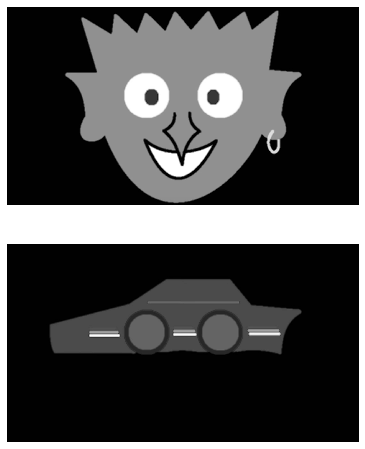

In [2]:
frizzy = np.array(Image.open("../../../images/frizzy.png").convert("L"))
froomer = np.array(Image.open("../../../images/froomer.png").convert("L"))

fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_image(frizzy, ax[0], cmap="gray")
plot_image(froomer, ax[1], cmap="gray")

In [33]:
def get_edge(im):
    sobel_x = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]], dtype=np.float32) / 8
    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]], dtype=np.float32) / 8
    grad_x = correlate2d(im, sobel_x)
    grad_y = correlate2d(im, sobel_y)
    grad_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
    return grad_magnitude


### Get Gradient of both images

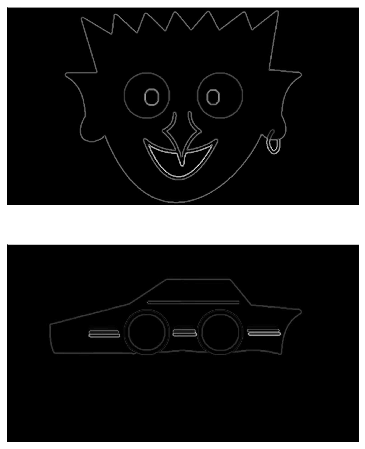

In [53]:
grad_frizzy = get_edge(frizzy)
grad_froomer = get_edge(froomer)
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_image(grad_frizzy, ax[0], cmap="gray")
plot_image(grad_froomer, ax[1], cmap="gray")

### Get Common edges

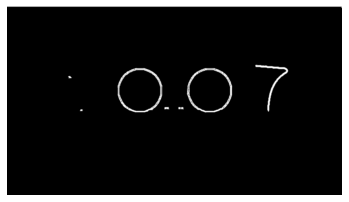

In [59]:
th = 1
common_edges = (((grad_frizzy > th) & (grad_froomer > th)) * 255).astype(np.uint8)
plot_image(common_edges, plt.gca(), cmap="gray", interpolation="bilinear")

### So the code is 007